In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def sqw_cyle_k_tess_op(N,theta):
    II = np.eye(N)
    
    Hg = np.zeros([N,N])
    Hr = np.zeros([N,N])
    Hb = np.zeros([N,N])
    for x in range(N//k):
        # Green
        Hg[3*x, 3*x + 1] = 1
        Hg[3*x + 1, 3*x] = 1
        Hg[3*x + 2, 3*x + 2] = 1
        
        # Red
        Hr[3*x + 1, 3*x + 2] = 1
        Hr[3*x + 2, 3*x + 1] = 1
        Hr[(3*x + 3)%N, (3*x + 3)%N] = 1
        
        # Blue
        Hb[3*x + 2, (3*x + 3)%N] = 1
        Hb[(3*x + 3)%N, 3*x + 2] = 1
        Hb[(3*x + 4)%N, (3*x + 4)%N] = 1
       
    Ug = np.cos(theta[0])*II + 1j*np.sin(theta[0])*Hg
    Ur = np.cos(theta[1])*II + 1j*np.sin(theta[1])*Hr
    Ub = np.cos(theta[2])*II + 1j*np.sin(theta[2])*Hb
    return Ug, Ur, Ub

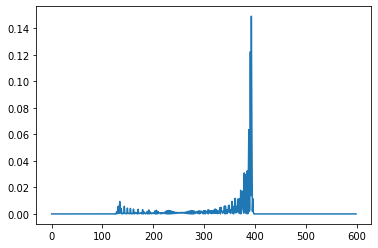

In [49]:
k = 3
n = 200
N = k*n
theta = [np.pi/3]*k
steps = 70

initial = np.zeros([N,1])
initial[N//2] = 1

Ug, Ur, Ub = sqw_cyle_k_tess_op(N,theta)
U = Ub @ Ug @ Ug

for t in range(steps):
    initial = U @ initial
    
plt.plot(np.abs(initial)**2)
plt.show()